In [ ]:
!git clone https://dagshub.com/Omdena/AlgeriaBhopal_WaterManagementandForecasting.git

Cloning into 'AlgeriaBhopal_WaterManagementandForecasting'...
remote: Enumerating objects: 469, done.
remote: Counting objects: 100% (469/469), done.
remote: Compressing objects: 100% (453/453), done.
remote: Total 469 (delta 184), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (469/469), 48.04 MiB | 3.45 MiB/s, done.
Resolving deltas: 100% (184/184), done.
Updating files: 100% (84/84), done.


In [ ]:
import pandas as pd

In [ ]:
df_test = pd.read_csv('/content/AlgeriaBhopal_WaterManagementandForecasting/src/data/final/Final Algeria Datasets/test_algiers.csv')

df_train = pd.read_csv('/content/AlgeriaBhopal_WaterManagementandForecasting/src/data/final/Final Algeria Datasets/train_algiers.csv')

In [ ]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year
df_train = df_train.drop(columns=['date'])


df_test['date'] = pd.to_datetime(df_test['date'])
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test = df_test.drop(columns=['date'])

In [ ]:
print(f'df_train shape: {df_train.shape}')
print(f'df_test shape:  {df_test.shape}')

df_train shape: (2450, 35)
df_test shape:  (545, 35)


In [ ]:
df_train.head()

,precipitation_sum (mm),temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,water_availability,day,month,year
0,0.0,11.984259,0.007020,79.653691,-1.008622,-1.247756,11.792043,0.000000,0.023497,290.359024,...,238.455282,4.762528,0.0,217.475818,0.000013,935.769155,-200.341947,1,4,2015
1,0.0,12.426162,0.006639,73.369087,-0.882894,-0.674852,10.580860,0.000000,0.032284,288.967108,...,236.761384,4.734760,0.0,214.612400,0.000010,933.421715,-173.229781,2,4,2015
2,0.0,13.183237,0.007103,73.648926,-0.554821,-0.975509,13.224449,0.000000,0.021108,289.621761,...,235.312021,4.710264,0.0,215.533733,0.000011,931.213284,-175.856488,3,4,2015
3,0.0,12.117507,0.006628,74.249417,-0.762048,-1.315288,11.899657,0.000000,0.022526,289.779312,...,234.026542,4.696759,0.0,202.458474,0.000009,929.092368,-164.456208,4,4,2015
4,0.0,11.775280,0.006604,75.414558,-1.970064,-1.730378,13.397951,0.015292,0.027819,289.759368,...,232.774424,4.638155,0.0,222.788846,0.000011,926.930220,-186.252044,5,4,2015


# Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [80]:
X_train = df_train.drop('water_availability', axis=1)
y_train = df_train['water_availability']

X_test = df_test.drop('water_availability', axis=1)
y_test = df_test['water_availability']

In [88]:
model = XGBRegressor(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=300,
)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 450.92626836646434


In [96]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=10000,
    early_stopping_rounds=200,
    learning_rate=0.1,
    max_depth=1,
    eval_metric="rmse"
)


model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

[0]	validation_0-rmse:260.93529	validation_1-rmse:229.64884
[10]	validation_0-rmse:147.49836	validation_1-rmse:136.28397
[20]	validation_0-rmse:98.43856	validation_1-rmse:97.99417
[30]	validation_0-rmse:74.55485	validation_1-rmse:79.88379
[40]	validation_0-rmse:60.04044	validation_1-rmse:68.02718
[50]	validation_0-rmse:49.77956	validation_1-rmse:59.33291
[60]	validation_0-rmse:42.47683	validation_1-rmse:53.59873
[70]	validation_0-rmse:37.14913	validation_1-rmse:50.00583
[80]	validation_0-rmse:33.11465	validation_1-rmse:47.04968
[90]	validation_0-rmse:29.93115	validation_1-rmse:44.53609
[100]	validation_0-rmse:27.46864	validation_1-rmse:42.59844
[110]	validation_0-rmse:25.56140	validation_1-rmse:40.77220
[120]	validation_0-rmse:24.07942	validation_1-rmse:39.38262
[130]	validation_0-rmse:22.90035	validation_1-rmse:36.85114
[140]	validation_0-rmse:21.97228	validation_1-rmse:35.44577
[150]	validation_0-rmse:21.21331	validation_1-rmse:34.19446
[160]	validation_0-rmse:20.55348	validation_1-r

In [99]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=30000,
    early_stopping_rounds=100,
    learning_rate=0.1,
    max_depth=1,
    eval_metric="rmse"
)


model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

[0]	validation_0-rmse:260.93529	validation_1-rmse:229.64884
[10]	validation_0-rmse:147.49836	validation_1-rmse:136.28397
[20]	validation_0-rmse:98.43856	validation_1-rmse:97.99417
[30]	validation_0-rmse:74.55485	validation_1-rmse:79.88379
[40]	validation_0-rmse:60.04044	validation_1-rmse:68.02718
[50]	validation_0-rmse:49.77956	validation_1-rmse:59.33291
[60]	validation_0-rmse:42.47683	validation_1-rmse:53.59873
[70]	validation_0-rmse:37.14913	validation_1-rmse:50.00583
[80]	validation_0-rmse:33.11465	validation_1-rmse:47.04968
[90]	validation_0-rmse:29.93115	validation_1-rmse:44.53609
[100]	validation_0-rmse:27.46864	validation_1-rmse:42.59844
[110]	validation_0-rmse:25.56140	validation_1-rmse:40.77220
[120]	validation_0-rmse:24.07942	validation_1-rmse:39.38262
[130]	validation_0-rmse:22.90035	validation_1-rmse:36.85114
[140]	validation_0-rmse:21.97228	validation_1-rmse:35.44577
[150]	validation_0-rmse:21.21331	validation_1-rmse:34.19446
[160]	validation_0-rmse:20.55348	validation_1-r

# Best Model:

In [106]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=30000,
    early_stopping_rounds=200,
    learning_rate=0.1,
    max_depth=1,
    eval_metric="rmse"
)


model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

[0]	validation_0-rmse:260.93529	validation_1-rmse:229.64884
[10]	validation_0-rmse:147.49836	validation_1-rmse:136.28397
[20]	validation_0-rmse:98.43856	validation_1-rmse:97.99417
[30]	validation_0-rmse:74.55485	validation_1-rmse:79.88379
[40]	validation_0-rmse:60.04044	validation_1-rmse:68.02718
[50]	validation_0-rmse:49.77956	validation_1-rmse:59.33291
[60]	validation_0-rmse:42.47683	validation_1-rmse:53.59873
[70]	validation_0-rmse:37.14913	validation_1-rmse:50.00583
[80]	validation_0-rmse:33.11465	validation_1-rmse:47.04968
[90]	validation_0-rmse:29.93115	validation_1-rmse:44.53609
[100]	validation_0-rmse:27.46864	validation_1-rmse:42.59844
[110]	validation_0-rmse:25.56140	validation_1-rmse:40.77220
[120]	validation_0-rmse:24.07942	validation_1-rmse:39.38262
[130]	validation_0-rmse:22.90035	validation_1-rmse:36.85114
[140]	validation_0-rmse:21.97228	validation_1-rmse:35.44577
[150]	validation_0-rmse:21.21331	validation_1-rmse:34.19446
[160]	validation_0-rmse:20.55348	validation_1-r

In [121]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=30000,
    early_stopping_rounds=200,
    learning_rate=0.2,
    max_depth=1,
    eval_metric="rmse"
)


model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=10
)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

[0]	validation_0-rmse:242.51385	validation_1-rmse:215.67883
[10]	validation_0-rmse:92.58817	validation_1-rmse:94.29690
[20]	validation_0-rmse:57.70738	validation_1-rmse:66.17493
[30]	validation_0-rmse:41.81709	validation_1-rmse:53.13614
[40]	validation_0-rmse:33.55738	validation_1-rmse:46.96828
[50]	validation_0-rmse:28.89472	validation_1-rmse:42.05249
[60]	validation_0-rmse:26.11926	validation_1-rmse:38.57386
[70]	validation_0-rmse:24.46286	validation_1-rmse:35.87721
[80]	validation_0-rmse:23.28977	validation_1-rmse:34.28684
[90]	validation_0-rmse:22.40093	validation_1-rmse:33.26046
[100]	validation_0-rmse:21.66016	validation_1-rmse:32.60191
[110]	validation_0-rmse:21.02399	validation_1-rmse:31.77082
[120]	validation_0-rmse:20.47617	validation_1-rmse:30.52892
[130]	validation_0-rmse:19.99227	validation_1-rmse:30.03326
[140]	validation_0-rmse:19.55256	validation_1-rmse:29.59287
[150]	validation_0-rmse:19.15242	validation_1-rmse:28.84639
[160]	validation_0-rmse:18.78822	validation_1-rms

# Grid search

In [97]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5],
}

# Create an XGBoost regressor
xgb_model = XGBRegressor(eval_metric="rmse")

# Define Mean Squared Error as the scoring metric
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create GridSearchCV object
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring=scorer,
    cv=3,  # Adjust the number of folds as needed
    verbose=2,
    n_jobs=-1  # Use parallel processing
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Mean Squared Error: 444.22296666606434


# Plot:

In [122]:
for i in range(10):
  print(f'Actural | Predicted : {y_test[i]} | {predictions[i]}')

Actural | Predicted : -132.53062682842443 | -120.54443359375
Actural | Predicted : -134.05429410667216 | -121.84249877929688
Actural | Predicted : -137.8135332002526 | -124.34825134277344
Actural | Predicted : -184.83776790582084 | -176.7545928955078
Actural | Predicted : -183.85383349047092 | -169.38902282714844
Actural | Predicted : 440.80385406123537 | 446.581787109375
Actural | Predicted : 33.12728895498208 | 43.24580383300781
Actural | Predicted : -152.3626211005144 | -139.92181396484375
Actural | Predicted : -197.7728027076089 | -190.77444458007812
Actural | Predicted : 286.3173116953009 | 297.7922668457031


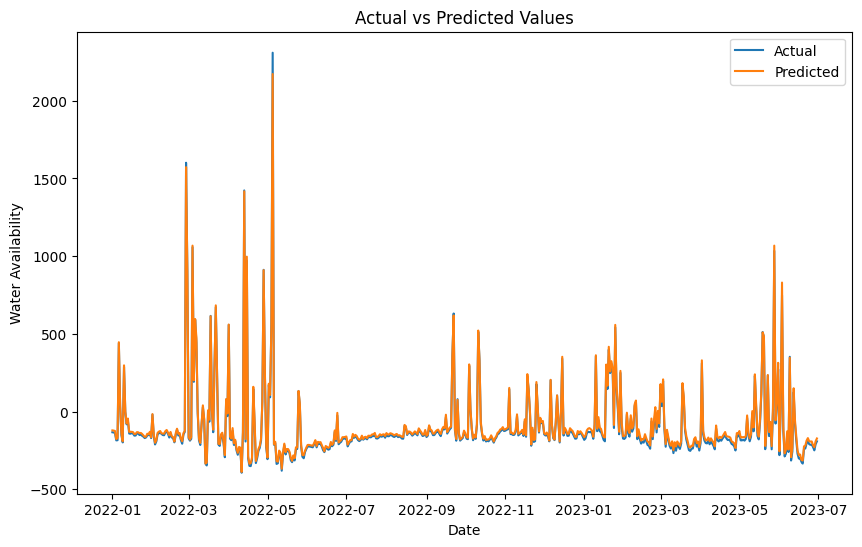

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your df_test DataFrame
df_test['date'] = pd.to_datetime(df_test[['year', 'month', 'day']])

# Create a DataFrame with 'date' and 'predictions' columns
results_df = pd.DataFrame({'date': df_test['date'], 'actual': y_test, 'predicted': predictions})

# Set 'date' as the index
results_df.set_index('date', inplace=True)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['actual'], label='Actual')
plt.plot(results_df.index, results_df['predicted'], label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Water Availability')
plt.legend()
plt.show()


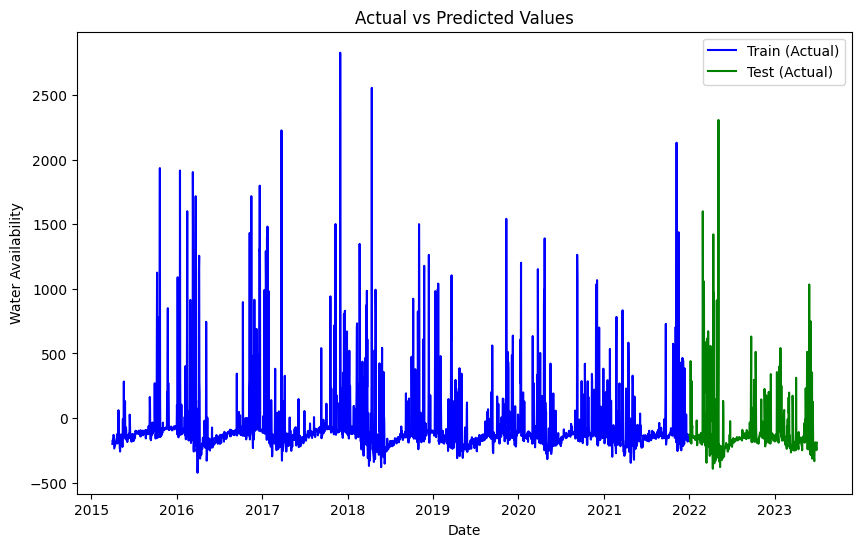

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your df_train and df_test DataFrames
df_train['date'] = pd.to_datetime(df_train[['year', 'month', 'day']])
df_test['date'] = pd.to_datetime(df_test[['year', 'month', 'day']])

# Create DataFrames with 'date' and 'actual' columns for both train and test data
train_results_df = pd.DataFrame({'date': df_train['date'], 'actual': y_train, 'source': 'train'})
test_results_df = pd.DataFrame({'date': df_test['date'], 'actual': y_test, 'predicted': predictions, 'source': 'test'})

# Concatenate train and test DataFrames
results_df = pd.concat([train_results_df, test_results_df], ignore_index=True)

# Set 'date' as the index
results_df.set_index('date', inplace=True)

# Plot the actual vs predicted values with different colors
plt.figure(figsize=(10, 6))
plt.plot(results_df[results_df['source'] == 'train'].index, results_df[results_df['source'] == 'train']['actual'], label='Train (Actual)', color='blue')
plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['actual'], label='Test (Actual)', color='green')
# plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['predicted'], label='Test (Predicted)', color='orange')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Water Availability')
plt.legend()
plt.show()


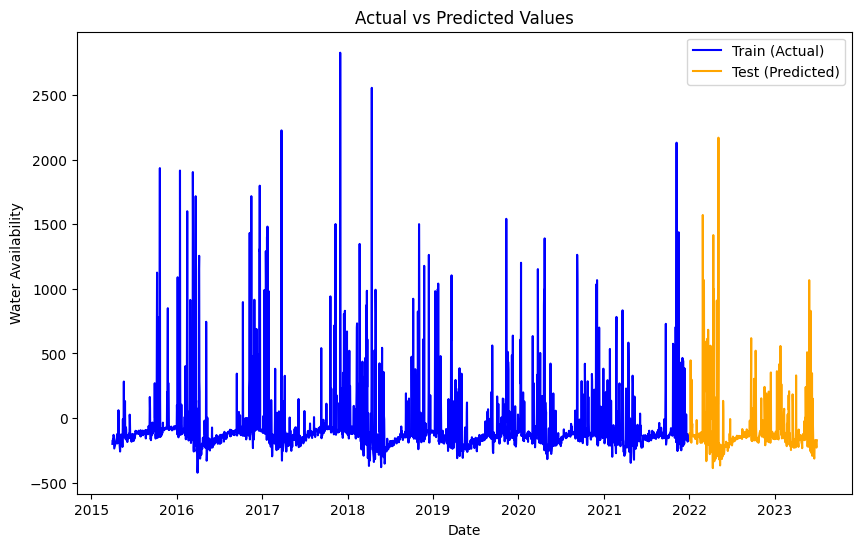

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your df_train and df_test DataFrames
df_train['date'] = pd.to_datetime(df_train[['year', 'month', 'day']])
df_test['date'] = pd.to_datetime(df_test[['year', 'month', 'day']])

# Create DataFrames with 'date' and 'actual' columns for both train and test data
train_results_df = pd.DataFrame({'date': df_train['date'], 'actual': y_train, 'source': 'train'})
test_results_df = pd.DataFrame({'date': df_test['date'], 'actual': y_test, 'predicted': predictions, 'source': 'test'})

# Concatenate train and test DataFrames
results_df = pd.concat([train_results_df, test_results_df], ignore_index=True)

# Set 'date' as the index
results_df.set_index('date', inplace=True)

# Plot the actual vs predicted values with different colors
plt.figure(figsize=(10, 6))
plt.plot(results_df[results_df['source'] == 'train'].index, results_df[results_df['source'] == 'train']['actual'], label='Train (Actual)', color='blue')
# plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['actual'], label='Test (Actual)', color='green')
plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['predicted'], label='Test (Predicted)', color='orange')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Water Availability')
plt.legend()
plt.show()


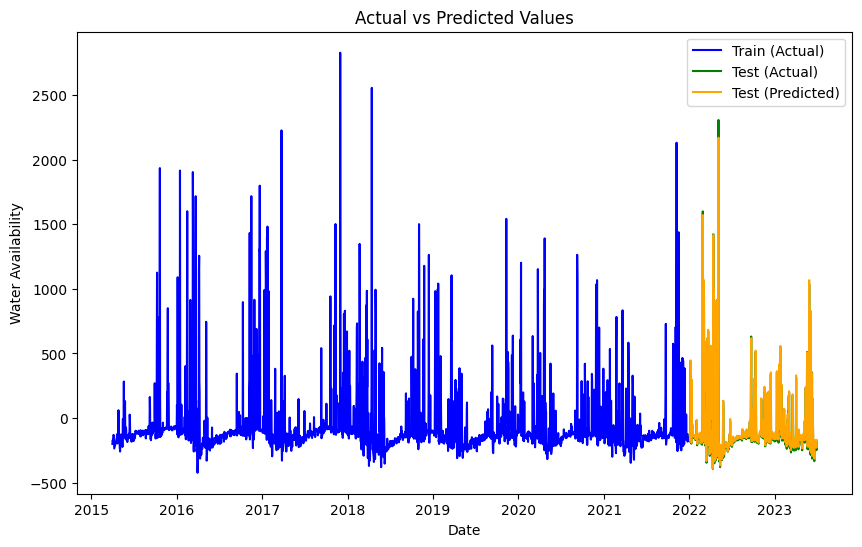

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' is a column in your df_train and df_test DataFrames
df_train['date'] = pd.to_datetime(df_train[['year', 'month', 'day']])
df_test['date'] = pd.to_datetime(df_test[['year', 'month', 'day']])

# Create DataFrames with 'date' and 'actual' columns for both train and test data
train_results_df = pd.DataFrame({'date': df_train['date'], 'actual': y_train, 'source': 'train'})
test_results_df = pd.DataFrame({'date': df_test['date'], 'actual': y_test, 'predicted': predictions, 'source': 'test'})

# Concatenate train and test DataFrames
results_df = pd.concat([train_results_df, test_results_df], ignore_index=True)

# Set 'date' as the index
results_df.set_index('date', inplace=True)

# Plot the actual vs predicted values with different colors
plt.figure(figsize=(10, 6))
plt.plot(results_df[results_df['source'] == 'train'].index, results_df[results_df['source'] == 'train']['actual'], label='Train (Actual)', color='blue')
plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['actual'], label='Test (Actual)', color='green')
plt.plot(results_df[results_df['source'] == 'test'].index, results_df[results_df['source'] == 'test']['predicted'], label='Test (Predicted)', color='orange')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Water Availability')
plt.legend()
plt.show()
